<h1><center>  Unsupervised Learning algorithms and Topic Modeling</center>
    
<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\

```Image source: https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left">

 ### Required Packages or Dependencies

In [6]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np # matrix calculation
import pandas as pd #import data nicely
import matplotlib.pyplot as plt # plot things nicely
from collections import Counter # not a default function but very useful - counter



## Dataset
> Collaborative problem solving (CPS) Data (Polyak et al., 2017).\
> *“a sample of middle school children who interacted with a game-like, online simulation of collaborative problem-solving tasks.”*

---
#### Collaborative Problem Solving Variables

| Variable            |
|-----------------------------|
| Feture Identification (FI)                 |
| Maintaining a Shared Understanding (MU)                     |
| Engagement/Interaction (EN)           |
| Strategy (S) |
| Evaluate (EV)             |




In [7]:
df = pd.read_csv('train_rel_2.tsv', sep='\t')
df = df[df['EssaySet'] == 10]
response = df.EssayText.apply(lambda x: x.split('::')[1])
response

,EssayText
15403,black might affect the dog house because then...
15404,White because you wouldn't want the dog to ge...
15405,the color white will reflect the suns rays of...
15406,this color will keep the dog house cooler ins...
15407,I would use a light color like White in this ...
...,...
17038,white becuase if you live in a hot place the ...
17039,This color will affect the doghouse for the b...
17040,i think light gray would work the best becaus...
17041,"if they painted the doghouse dark gray, then..."


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: Clustering
 > Let's conduct clustering analysis with our `response` dataset.

 > Remember we learned several variations of clustering algorithms -- K-means, Hiearchical clustering..\
 > We can do the analysis simply using `sklearn.cluster`. In order to call the algorithms\
 > `from sklearn.cluster import KMeans` and `from sklearn.cluster import AgglomerativeClustering`

### Kmeans Clustering

Counter({1: 983, 0: 537, 2: 120})


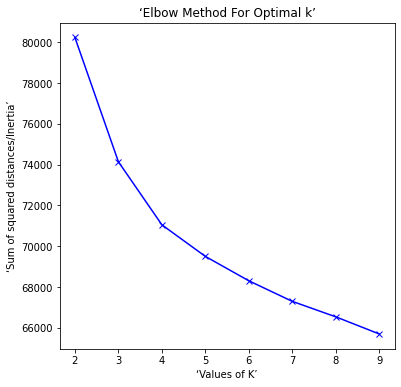

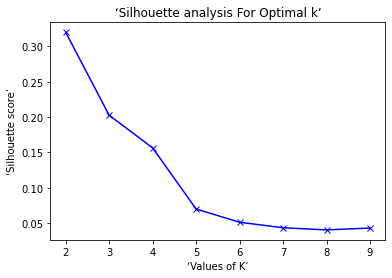

Counter({0: 983, 1: 537, 2: 120})


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt # this is to plot our results
from sklearn.cluster import KMeans # kmeans algorithm

%matplotlib inline
plt.figure(figsize=(6, 6)) # setting the plot resolutions

################ What was our CPS data called?


# STEP 1: VECTORIZATION
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer()
data = cv.fit_transform(response)


# STEP 2: CLUSTERING WITH KMEANS
kmeans= KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
print(Counter(kmeans_labels))

###### How do we find the best k ?

silhouette_avg = [] #silhouette score
Sum_of_squared_distances = [] #sum of square distance
K = range(2,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_

  Sum_of_squared_distances.append(kmeans.inertia_)
  from sklearn.metrics import silhouette_score
  silhouette_avg.append(silhouette_score(data, cluster_labels))

 # sum of square distance
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("‘Values of K’")
plt.ylabel("‘Sum of squared distances/Inertia’")
plt.title("‘Elbow Method For Optimal k’")
plt.show()

 # silhouette score
plt.plot(K,silhouette_avg, "bx-")
plt.xlabel("‘Values of K’")
plt.ylabel("‘Silhouette score’")
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()

# STEP 3: Final Clustering Decision

kmeans= KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
print(Counter(kmeans_labels))

################ How do we extract a feature matrix from a pandas dataframe?
'''
data.columns = ['FI','MU','EM', 'EV', 'S']
kmeans = KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
print(Counter(kmeans.labels_))

color_theme = np.array(['red','green','blue'])

plt.scatter(x=data.FI, y=data.EM,
            c=color_theme[kmeans.labels_], s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()
'''

kmeans_labels

### Hierarchical Clustering

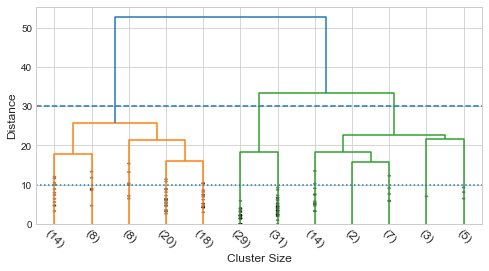

In [ ]:
import matplotlib.pyplot as plt # this is to plot our results
from scipy.cluster.hierarchy import dendrogram, linkage # this is to define a linkage method
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 4))

################ Let's define a linkage method


Z = linkage(data, 'average')

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=30, linestyle='dashed')
plt.axhline(y=10, linestyle='dotted')
plt.show()




In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') #FIT AND LEARN MODEL
ac_labels = cluster.fit_predict(data)
ac_labels

array([1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2])

### Let's compare the model results
> explore! `kmeans_labels`, `ac_labels`, and `dbscan_labels`\
> Let's try to put them into a dataframe.


In [ ]:
result = pd.DataFrame(list(zip(kmeans_labels, ac_labels)))
result.columns = ['KC', 'HC']

In [ ]:
pd.crosstab(result['KC'], result.HC)

HC,0,1,2
KC,,,
0,0,7,60
1,30,24,0
2,38,0,0


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 3: Topic Modeling: LDA
 > Let's conduct a topic modeling analysis with our CPS dataset.


In [10]:
import nltk
nltk.download('punkt_tab')
data_words = response.apply(nltk.word_tokenize)
data_words

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 1), (21, 1)]


### Example Implementation

In [11]:
import gensim
from pprint import pprint #pretty print
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"the" + 0.044*"," + 0.032*"." + 0.022*"it" + 0.020*"be" + 0.017*"dog" '
  '+ 0.015*"a" + 0.015*"(" + 0.015*"and" + 0.014*"in"'),
 (1,
  '0.118*"the" + 0.037*"." + 0.022*"dog" + 0.020*"color" + 0.019*"," + '
  '0.017*"it" + 0.016*"be" + 0.016*"in" + 0.015*"to" + 0.015*"would"'),
 (2,
  '0.072*"the" + 0.041*"," + 0.030*"." + 0.025*"would" + 0.021*"and" + '
  '0.016*"it" + 0.015*"dog" + 0.015*"doghouse" + 0.014*"to" + 0.014*"be"'),
 (3,
  '0.060*"the" + 0.034*"." + 0.028*")" + 0.027*"(" + 0.025*"DEG" + 0.021*"," + '
  '0.020*"C" + 0.019*"it" + 0.019*"black" + 0.018*"would"'),
 (4,
  '0.097*"the" + 0.028*"it" + 0.025*"white" + 0.024*"." + 0.021*"dog" + '
  '0.020*"of" + 0.020*"house" + 0.020*"in" + 0.018*"black" + 0.017*"and"'),
 (5,
  '0.066*"the" + 0.037*"it" + 0.027*"." + 0.022*"," + 0.020*"will" + '
  '0.018*"color" + 0.015*"in" + 0.015*"dog" + 0.014*"because" + 0.014*"white"'),
 (6,
  '0.059*"the" + 0.026*"." + 0.026*"DEG" + 0.026*")" + 0.026*"(" + 0.022*"," + '
  '0.019

### Optimal K (Topic Numbers)

In [15]:
### How do we find the best K?

from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=data_words,
                                     dictionary=id2word,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)
print(lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Coherence Score:  0.46937791987253397
-5.612269996259262


In [16]:
import gensim
from gensim.models import CoherenceModel
import numpy as np
import matplotlib.pyplot as plt

# Assuming corpus, id2word, and data_words are already defined
# You should adjust this part to match your data preprocessing.

# Function to compute the coherence score for a range of topics
def evaluate_num_topics(corpus, id2word, data_words, min_topics=2, max_topics=15, step=1):
    coherence_scores = []
    perplexity_scores = []
    topic_range = range(min_topics, max_topics + 1, step)

    for num_topics in topic_range:
        # Train the LDA model
        lda_model = gensim.models.LdaMulticore(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=100,
            chunksize=100,
            passes=10,
            per_word_topics=True,
            eval_every=5  # You can adjust this for more frequent evaluations
        )

        # Calculate coherence score using the 'c_v' method
        coherence_model_lda = CoherenceModel(
            model=lda_model,
            texts=data_words,
            dictionary=id2word,
            coherence='c_v'
        )
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_lda)

        # Calculate perplexity score
        perplexity = lda_model.log_perplexity(corpus)
        perplexity_scores.append(perplexity)

        print(f'Num Topics: {num_topics}, Coherence Score: {coherence_lda}, Perplexity: {perplexity}')

    return topic_range, coherence_scores, perplexity_scores

# Define the range for num_topics (e.g., from 2 to 15 topics)
min_topics = 2
max_topics = 15
step = 1

# Run evaluation
topic_range, coherence_scores, perplexity_scores = evaluate_num_topics(
    corpus=corpus,
    id2word=id2word,
    data_words=data_words,
    min_topics=min_topics,
    max_topics=max_topics,
    step=step
)

# Plot Coherence and Perplexity Scores
plt.figure(figsize=(12, 6))

# Coherence plot
plt.subplot(1, 2, 1)
plt.plot(topic_range, coherence_scores, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

# Perplexity plot
plt.subplot(1, 2, 2)
plt.plot(topic_range, perplexity_scores, marker='x', color='red')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

plt.tight_layout()
plt.show()

# Find the best number of topics based on the highest coherence score
best_num_topics = topic_range[np.argmax(coherence_scores)]
print(f'\nBest number of topics: {best_num_topics}')


Num Topics: 2, Coherence Score: 0.5108891972658971, Perplexity: -5.388262226260613
Num Topics: 3, Coherence Score: 0.4977455585513762, Perplexity: -5.396629377612978
Num Topics: 4, Coherence Score: 0.5012399126973422, Perplexity: -5.386830351958836
Num Topics: 5, Coherence Score: 0.5081018719822316, Perplexity: -5.417767858720467
Num Topics: 6, Coherence Score: 0.5026346180608408, Perplexity: -5.434576780044136
Num Topics: 7, Coherence Score: 0.5164241293790864, Perplexity: -5.4440397765158535
Num Topics: 8, Coherence Score: 0.4770805575384197, Perplexity: -5.490261505472633
Num Topics: 9, Coherence Score: 0.48522826243290473, Perplexity: -5.549864611539157
Num Topics: 10, Coherence Score: 0.44664595620055686, Perplexity: -5.613219223552181


Process ForkPoolWorker-13:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/usr/local/lib/python3.10/dist-packages/gensim/models/ldamulticore.py", line 346, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/usr/local/lib/python3.10/dist-packages/gensim/models/ldamodel.py", line 768, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/usr/local/lib/python3.10/dist-packages/gensim/models/ldamodel.py", line 720, in inference
    Elogthetad = dirichlet_expectation(gammad)
KeyboardInterrupt


KeyboardInterrupt: 

### Exercise

### 1. Identify and Fit your best topic model

In [ ]:
### your code here



### 2. Visualize the results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


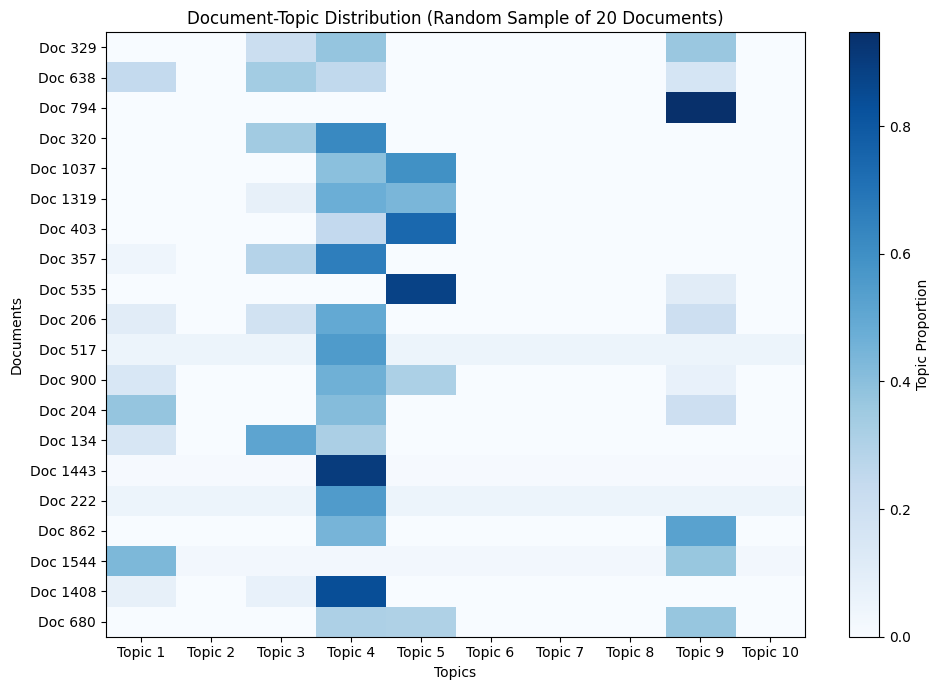

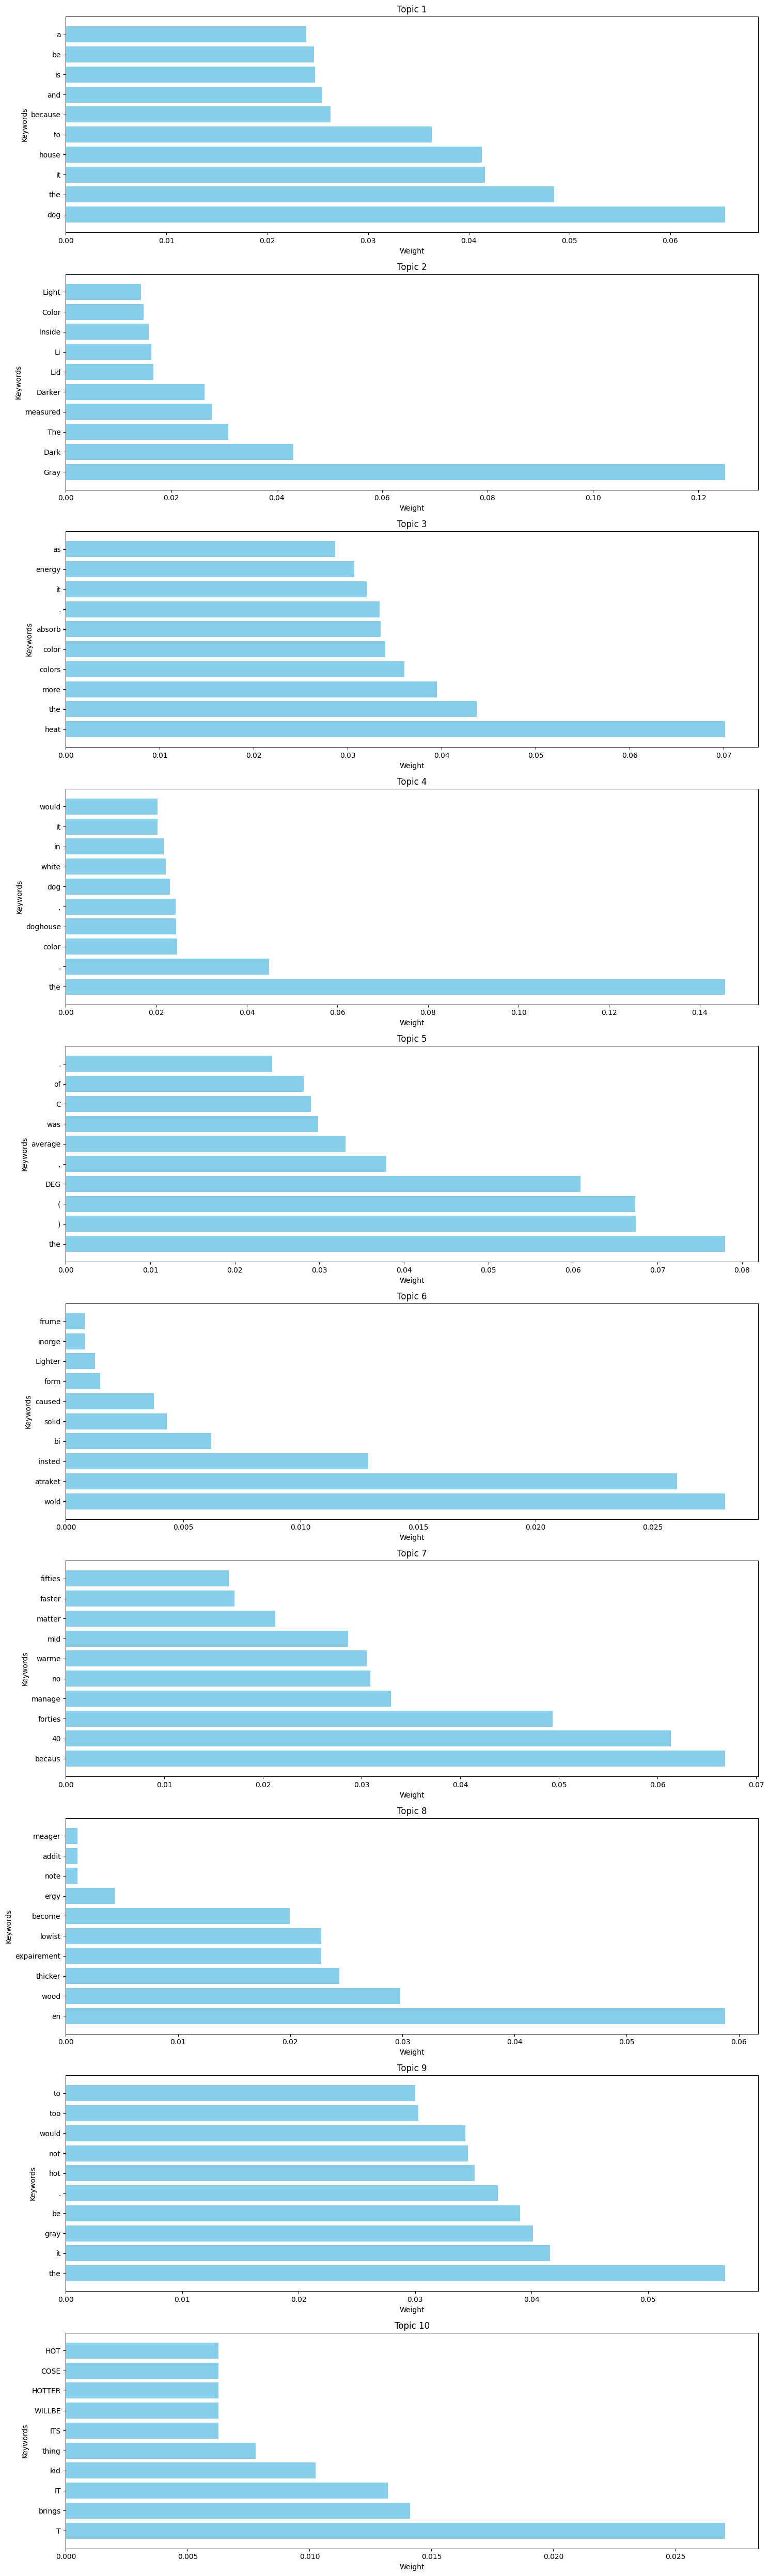

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_document_topic_distribution(lda_model, corpus, num_topics, num_docs_to_sample=20):
    """
    Visualize the topic distribution for a random sample of documents in the corpus.
    This function randomly selects `num_docs_to_sample` documents and plots their topic distributions.
    """
    # Randomly select a subset of documents (e.g., 20 random documents)
    sampled_docs_indices = random.sample(range(len(corpus)), num_docs_to_sample)

    # Get the topic distributions for the selected documents
    topic_distributions = [lda_model.get_document_topics(corpus[i]) for i in sampled_docs_indices]

    # Initialize a matrix to hold the topic distributions
    doc_topic_matrix = np.zeros((num_docs_to_sample, num_topics))

    # Populate the matrix with the topic proportions for each document
    for i, doc in enumerate(topic_distributions):
        for topic, prob in doc:
            doc_topic_matrix[i, topic] = prob

    # Plot the document-topic matrix
    plt.figure(figsize=(10, 7))
    plt.imshow(doc_topic_matrix, aspect='auto', cmap='Blues', interpolation='nearest')
    plt.colorbar(label='Topic Proportion')
    plt.title('Document-Topic Distribution (Random Sample of 20 Documents)')
    plt.xlabel('Topics')
    plt.ylabel('Documents')

    # Set labels for the y-axis (documents) and x-axis (topics)
    plt.yticks(np.arange(num_docs_to_sample), labels=[f'Doc {i+1}' for i in sampled_docs_indices])
    plt.xticks(np.arange(num_topics), labels=[f'Topic {i+1}' for i in range(num_topics)])

    # Display the plot
    plt.tight_layout()
    plt.show()

# Function to plot the top keywords for each topic
def plot_keywords_for_each_topic(lda_model, num_topics, num_words=10):
    """
    Plot the top keywords for each topic.
    """
    plt.figure(figsize=(15, num_topics * 5))  # Adjusting height dynamically based on number of topics

    for i in range(num_topics):
        # Get the top `num_words` words for topic `i`
        top_words = lda_model.show_topic(i, num_words)

        # Extract the words and their probabilities (weights)
        words, weights = zip(*top_words)

        # Create a bar plot for the top words in the topic
        plt.subplot(num_topics, 1, i+1)
        plt.barh(words, weights, color='skyblue')
        plt.title(f'Topic {i+1}')
        plt.xlabel('Weight')
        plt.ylabel('Keywords')

    plt.tight_layout()
    plt.show()

from wordcloud import WordCloud

# Function to plot the word cloud for each topic (optional, for a different visualization style)
def plot_wordcloud_for_each_topic(lda_model, num_topics, num_words=30):
    """
    Plot a word cloud for each topic to visualize the top keywords.
    """
    for i in range(num_topics):
        # Get the top `num_words` words for topic `i`
        top_words = lda_model.show_topic(i, num_words)

        # Create a dictionary of words and their weights for the word cloud
        word_dict = {word: weight for word, weight in top_words}

        # Create a word cloud for this topic
        plt.figure(figsize=(8, 6))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Topic {i+1}')
        plt.show()

# Assuming you have your LDA model (`lda_model`), `corpus`, and `num_topics` already defined
# Call the function to plot document-topic distribution for 20 random documents
plot_document_topic_distribution(lda_model, corpus, num_topics=lda_model.num_topics)

# Call the function to plot top keywords for each topic
plot_keywords_for_each_topic(lda_model, num_topics=lda_model.num_topics)

# Optionally, plot word clouds for each topic
#plot_wordcloud_for_each_topic(lda_model, num_topics=lda_model.num_topics)

In [20]:
!pip install pyLDAvis #this is for visualization (interactive)
import pyLDAvis.gensim_models
import os
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared =  pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.259839  0.035535       1        1  39.482184
4      0.229981  0.278376       2        1  24.211606
8      0.268790 -0.132244       3        1  15.145983
0      0.240931 -0.162728       4        1  11.196493
2      0.198025 -0.007446       5        1   8.084442
1     -0.227657  0.011225       6        1   0.579617
6     -0.250853 -0.007070       7        1   0.399972
9     -0.241539 -0.005508       8        1   0.358615
7     -0.241571 -0.005433       9        1   0.291733
5     -0.235947 -0.004708      10        1   0.249354, topic_info=        Term         Freq        Total Category  logprob  loglift
143        )  1185.000000  1185.000000  Default  30.0000  30.0000
142        (  1184.000000  1184.000000  Default  29.0000  29.0000
148      DEG  1070.000000  1070.000000  Default  28.0000  28.0000
36      heat   628.000000   628.000000  Default  27.0000  27.0000
5        dog  1476.000000  1476.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
553  makeing     0.057110     3.774760  Topic10  -8.0609   1.8029
844    sleep     0.057086    13.625032  Topic10  -8.0613   0.5189
570      ack     0.057073    11.391268  Topic10  -8.0615   0.6978
571       bl     0.057073    11.391268  Topic10  -8.0615   0.6978
871    warme     0.057064     9.604386  Topic10  -8.0617   0.8683

[524 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2380      5  0.931677        $
1265      3  0.956794        &
142       2  0.999769        (
143       2  0.999135        )
29        1  0.430767        ,
...     ...       ...      ...
451       3  0.987350  wouldnt
940       4  0.960856     year
28        1  0.377921      you
28        4  0.620537      you
528       1  0.961142     your

[605 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 9, 1, 3, 2, 7, 10, 8, 6])